In [0]:
# Neccasary Library
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


In [0]:
# Define model saved directions path
path_1 = "/content/drive/My Drive/Colab Notebooks/planet_classification_w_localization/dnnmodel"
# Define test images directions path
path_2 = "/content/drive/My Drive/Colab Notebooks/planet_classification_w_localization/testing_images"

In [15]:
def load_model_x(path):
  model = load_model(os.path.join(path,'model.h5'))
  print("Model loading succesfully..")
  return model
model = load_model_x(path_1)

Model loading succesfully..


In [0]:
def load_picture(path):
  testing_picture = []
  for i in os.listdir(path):
    if not i.endswith('.jpg'):
      continue
    picture_path = os.path.join(path,i)
    image = cv2.imread(picture_path)
    testing_picture.append(image)
  return np.array(testing_picture)

In [0]:
def one_picture(path):
  picture = os.listdir(path)[0]
  picture_path = os.path.join(path,picture)
  image = cv2.imread(picture_path)
  return np.array([image])

In [0]:
image = load_picture(path_2)

In [19]:
 image.shape

(8, 300, 300, 3)

In [0]:
k,l = model.predict(image)

In [0]:
pred_labels = []
for i in range(len(k)):
    r = np.round(k[i],3).argmax()
    if r ==0 : pred_labels.append("EARTH")
    elif r ==1: pred_labels.append("JUPITER")
    elif r ==2: pred_labels.append("SATURN")
    elif r ==3: pred_labels.append("MARS") 

In [0]:
#Multiple images parameters
ımage_size = 300
w=300
h=300
columns = 3
rows =3 


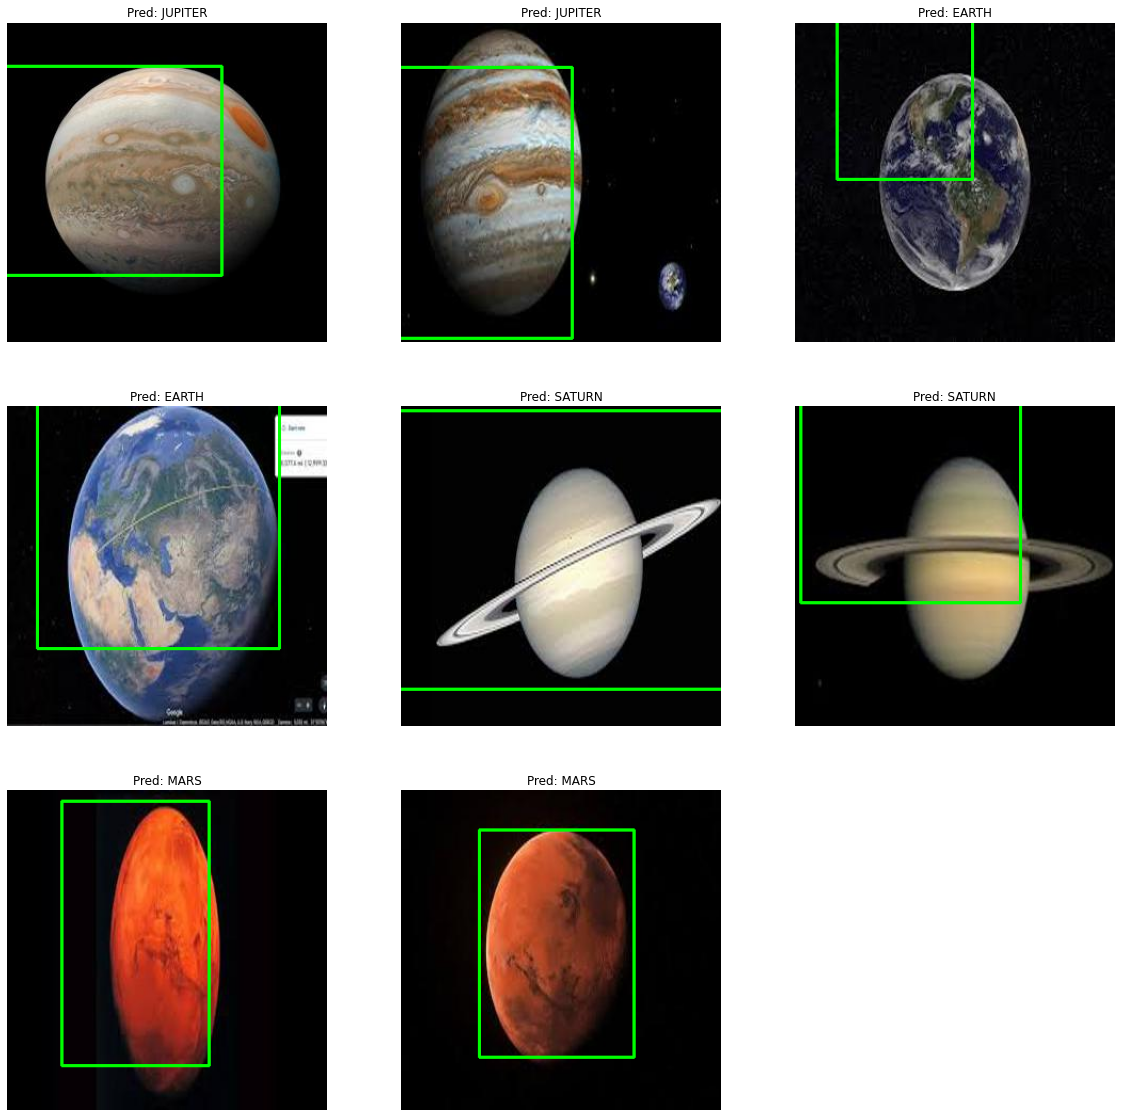

In [24]:
fig = plt.figure(figsize=(20, 20))
for m in range(1, columns*rows):
    img = image[m-1].reshape([ımage_size, ımage_size, 3])
    fig.add_subplot(rows, columns, m)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.rectangle(img, (l[m-1][0], l[m-1][1]), (l[m-1][2], l[m-1][3]), (0,255,0), 2)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()